In [2]:
import pandas as pd 
import numpy as np
import ast
import warnings; warnings.simplefilter('ignore')

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
cd ml-100k/

/Users/ayalahlou/Final Project 001/ml-100k


In [6]:
mov=pd.read_csv('movies_metadata.csv')
mov=mov.loc[:,'imdb_id':'original_title']
mov=mov.drop(columns=['original_language'])

In [8]:
mov.head(10)

,imdb_id,original_title
0,tt0114709,Toy Story
1,tt0113497,Jumanji
2,tt0113228,Grumpier Old Men
3,tt0114885,Waiting to Exhale
4,tt0113041,Father of the Bride Part II
5,tt0113277,Heat
6,tt0114319,Sabrina
7,tt0112302,Tom and Huck
8,tt0114576,Sudden Death
9,tt0113189,GoldenEye


# POPULARITY BASED RECOMMENDER

## By Popularity Only

In [11]:
movy=pd.read_csv('final.csv')
movy=movy[movy.popularity != '[]']
movy['popularity']=movy['popularity'].astype(float)
popularityREC=movy.sort_values(by=['popularity'], ascending=False).drop(['Unnamed: 0','id','release_date','keywords','tagline','overview','budget','vote_count','names','gender'], axis=1)
PRtable=popularityREC.head(10)
PRtable

,original_title,genres,popularity,vote_average
36859,Minions,"['Family', 'Animation', 'Adventure', 'Comedy']",547.488298,6.4
40876,Wonder Woman,"['Action', 'Adventure', 'Fantasy']",294.337037,7.2
41692,Beauty and the Beast,"['Family', 'Fantasy', 'Romance']",287.253654,6.8
42469,Baby Driver,"['Action', 'Crime']",228.032744,7.2
35247,Big Hero 6,"['Adventure', 'Family', 'Animation', 'Action',...",213.849907,7.8
40663,Deadpool,"['Action', 'Adventure', 'Comedy']",187.860492,7.4
40132,Guardians of the Galaxy Vol. 2,"['Action', 'Adventure', 'Comedy', 'Science Fic...",185.330992,7.6
9031,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",185.070892,7.2
38200,John Wick,"['Action', 'Thriller']",183.870374,7.0
36793,Gone Girl,"['Mystery', 'Thriller', 'Drama']",154.801009,7.9


## By Genre then Popularity

Let's convert the string in genres to a python list.

In [12]:
NewG=movy.sort_values(by=['popularity'], ascending=False).drop(['Unnamed: 0','id','release_date','keywords','tagline','overview','budget','vote_count','names','gender'], axis=1).head(100)
for i in NewG.index.values:
    NewG['genres'][i]=ast.literal_eval(NewG['genres'][i])

In [13]:
def popgenre():
    
    NewG=movy.sort_values(by=['popularity'], ascending=False).drop(['Unnamed: 0','id','release_date','keywords','tagline','overview','budget','vote_count','names','gender'], axis=1).head(100)
    for i in NewG.index.values:
        NewG['genres'][i]=ast.literal_eval(NewG['genres'][i])
    genre=input("What's your Favorite Movie Genre? ")
    for i in NewG.index.values:
        if genre not in NewG['genres'][i]:
                NewG=NewG[NewG.original_title != NewG['original_title'][i]]
    if len(NewG) ==0:
        return "Sorry, the Genre you are looking for ("+genre+"), is not Available in our Dataset. Please try again with another Genre." 
    else:
        print('Top ',len(NewG.head(10)),' Most Popular',genre,'Movies:')
        return NewG.head(10)
    

In [15]:
popgenre()

What's your Favorite Movie Genre? Action
Top  10  Most Popular Action Movies:


,original_title,genres,popularity,vote_average
40876,Wonder Woman,"[Action, Adventure, Fantasy]",294.337037,7.2
42469,Baby Driver,"[Action, Crime]",228.032744,7.2
35247,Big Hero 6,"[Adventure, Family, Animation, Action, Comedy]",213.849907,7.8
40663,Deadpool,"[Action, Adventure, Comedy]",187.860492,7.4
40132,Guardians of the Galaxy Vol. 2,"[Action, Adventure, Comedy, Science Fiction]",185.330992,7.6
9031,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",185.070892,7.2
38200,John Wick,"[Action, Thriller]",183.870374,7.0
39568,Captain America: Civil War,"[Adventure, Action, Science Fiction]",145.882135,7.1
34604,Pirates of the Caribbean: Dead Men Tell No Tales,"[Adventure, Action, Fantasy, Comedy]",133.827820,6.6
112,The Dark Knight,"[Drama, Action, Crime, Thriller]",123.167259,8.3


# Let's apply this recommendation to DKU CINEMA

In [17]:
dkucg=pd.read_csv('dkucinemaG.csv')
dkucg

,Genre,Title,Audience
0,Drama,Gifted,35
1,Drama,Flipped,92
2,Drama,Interstellar,21
3,Drama,The Godfather,34
4,Drama,The Pursuit of Happyness,27
5,Drama,10 Things I Hate About You,36
6,Action,2012,16
7,Romance,Flipped,92
8,Romance,10 Things I Hate About You,27
9,Adventure,Interstellar,21


,Audience
Genre,
Romance,59.500000
Drama,40.833333
Crime,34.000000
Comedy,27.000000
Adventure,18.500000
Science Fiction,18.500000
Action,16.000000


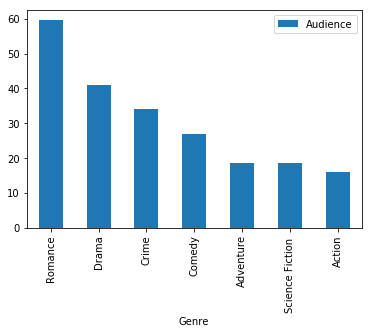

In [19]:
A=dkucg.groupby(['Genre']).mean().sort_values(by=['Audience'], ascending=False)
table1=A.plot.bar()
A

## DKU CINEMA Movie Recommendations based on the Genre with the greatest audience :

 Romance is DKU's students favourite Genre as it has the greatest mean audience 
 
 Let's input Romance in our function (popgenre()) to find movie recommendations for DKU Cinema for next week

In [20]:
popgenre()

What's your Favorite Movie Genre? Romance
Top  8  Most Popular Romance Movies:


,original_title,genres,popularity,vote_average
41692,Beauty and the Beast,"[Family, Fantasy, Romance]",287.253654,6.8
41483,The Bad Batch,"[Thriller, Romance, Science Fiction]",78.807200,5.3
6,Forrest Gump,"[Comedy, Drama, Romance]",48.307194,8.2
43642,君の名は。,"[Romance, Animation, Drama]",34.461252,8.5
8834,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",34.457024,9.1
40784,Me Before You,"[Drama, Romance]",34.347590,7.6
10377,The Twilight Saga: Eclipse,"[Adventure, Fantasy, Drama, Romance]",34.047399,5.9
37081,Fifty Shades of Grey,"[Drama, Romance, Thriller]",33.068431,5.2


Now let's write a function that generate Movie Recommendations for DKU Cinema even if the data changes in the next weeks, always considering the genre with the greatest mean audience.

In [21]:
def DKUpopgenre():
    A=dkucg.groupby(['Genre']).mean().sort_values(by=['Audience'], ascending=False)
    NewG=movy.sort_values(by=['popularity'], ascending=False).drop(['Unnamed: 0','id','release_date','keywords','tagline','overview','budget','vote_count','names','gender'], axis=1).head(100)
    for i in NewG.index.values:
        NewG['genres'][i]=ast.literal_eval(NewG['genres'][i])
    for i in NewG.index.values:
        if A['Audience'].index.values[0] not in NewG['genres'][i]:
                NewG=NewG[nouveau.original_title != NewG['original_title'][i]]
    li=[]
    for j in NewG.index.values:
            for i in range(len(mov)):
                if NewG['original_title'][j]==mov['original_title'][i]:
                    reclink='https://www.imdb.com/title/'+mov['imdb_id'][i]+'/?ref_=fn_al_tt_1'
                    li.append(reclink)
                    break
                elif NewG['original_title'][j]!=mov['original_title'][i] and i==45465:
                    reclink='(link not available)'
                    li.append(reclink)
                    break
    NewG['Link']=li
    if len(NewG) ==0:
        return "Sorry, the Genre you are looking for ("+A['Audience'].index.values[0]+"), is not Available in our Dataset. Please try again with another Genre." 
    else:
        print("Next Week, DKU's Cinema should play one of the following Most Popular "+A['Audience'].index.values[0]+" Movies :")
        return NewG.head(10)


In [ ]:
DKUpopgenre()

In [ ]:
def genrec():
    mov=pd.read_csv('movies_metadata.csv')
    fav=input("What's your favorite movie ? ")
    for i in range(len(mov)):
        if fav==mov['original_title'][i]:
            genre=mov['genres'][i]
            for i in range(len(genre)):
                
                